# Task-5: Advanced Analysis

## Description:

# Perform deeper analysis by grouping customers by tenure to compute statistics for charges and churn.
# Analyze churn rates by demographics (eg: gender, senior citizen status).
# payment methods, and contract types.
# Visualize trends over time (if applicable) or lifecycle stages to identify patterns.

# Importing Libraries

In [13]:
#Step-1:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import plotly.express as px

# Loading the Dataset

In [14]:
#Step-2: Load data
df = pd.read_csv("Telco_Customer_Churn.csv")  # or use the actual file path


# Display the Data

In [46]:
#Step-3: Preview
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,13-36 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37+ months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months


# Convert TotalCharges to numeric



In [47]:
#Step-4:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Droping the Rows

In [17]:
#Step-5: Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Create tenure groups

In [48]:
#Step-6:
bins = [0, 12, 36, np.inf]
labels = ['0-12 months', '13-36 months', '37+ months']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# --- Churn Analysis ---

In [51]:
#Step-7:

# 1. Churn by Tenure Group
churn_by_tenure = df.groupby('tenure_group', observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# 2. Churn by Gender
churn_by_gender = df.groupby('gender', observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# 3. Churn by Senior Citizen
churn_by_senior = df.groupby('SeniorCitizen', observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# 4. Churn by Payment Method
churn_by_payment = df.groupby('PaymentMethod', observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# 5. Churn by Contract Type
churn_by_contract = df.groupby('Contract', observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100


# Display results

In [52]:
#Step-8:
display("Churn by Tenure Group (%):", churn_by_tenure)
display("Churn by Gender (%):", churn_by_gender)
display("Churn by Senior Citizen (%):", churn_by_senior)
display("Churn by Payment Method (%):", churn_by_payment)
display("Churn by Contract Type (%):", churn_by_contract)

'Churn by Tenure Group (%):'

Churn,No,Yes
tenure_group,,
0-12 months,52.321839,47.678161
13-36 months,74.461207,25.538793
37+ months,88.070643,11.929357


'Churn by Gender (%):'

Churn,No,Yes
gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


'Churn by Senior Citizen (%):'

Churn,No,Yes
SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


'Churn by Payment Method (%):'

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


'Churn by Contract Type (%):'

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


# Bar Chart Visualization:

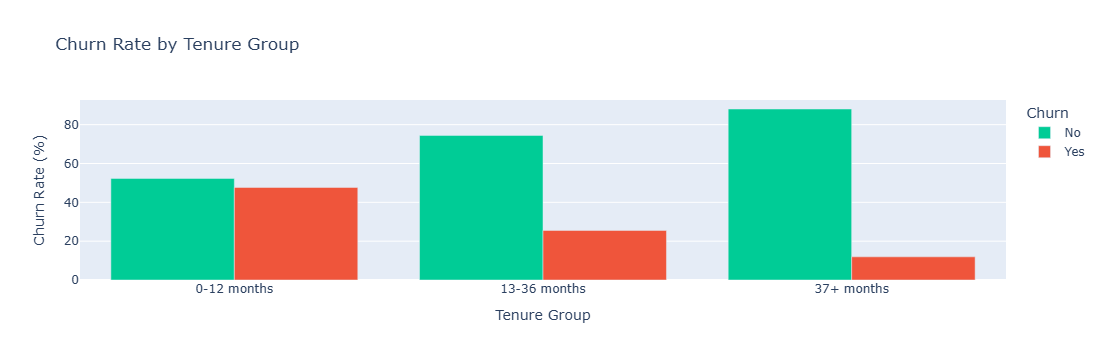

In [45]:
#Step-9:
# 1.Churn Rate by Tenure Group
fig_tenure = px.bar(
    churn_by_tenure,
    barmode='group',
    title='Churn Rate by Tenure Group',
    labels={'value': 'Percentage', 'tenure_group': 'Tenure Group'},
    color_discrete_sequence=['#00CC96', '#EF553B'])
fig_tenure.update_layout(yaxis_title='Churn Rate (%)')
fig_tenure.show()

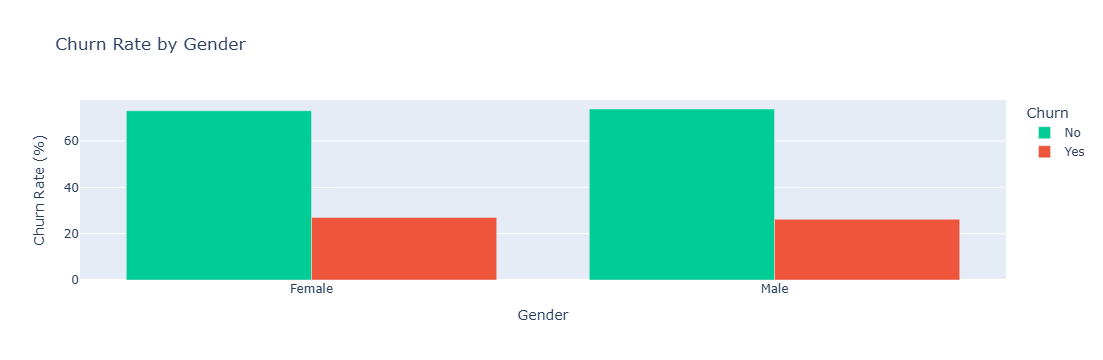

In [36]:
#Step-10:
# 2.Churn Rate by Gender
fig_gender = px.bar(
    churn_by_gender,
    barmode='group',
    title='Churn Rate by Gender',
    labels={'value': 'Percentage', 'gender': 'Gender'},
    color_discrete_sequence=['#00CC96', '#EF553B'])
fig_gender.update_layout(yaxis_title='Churn Rate (%)')
fig_gender.show()

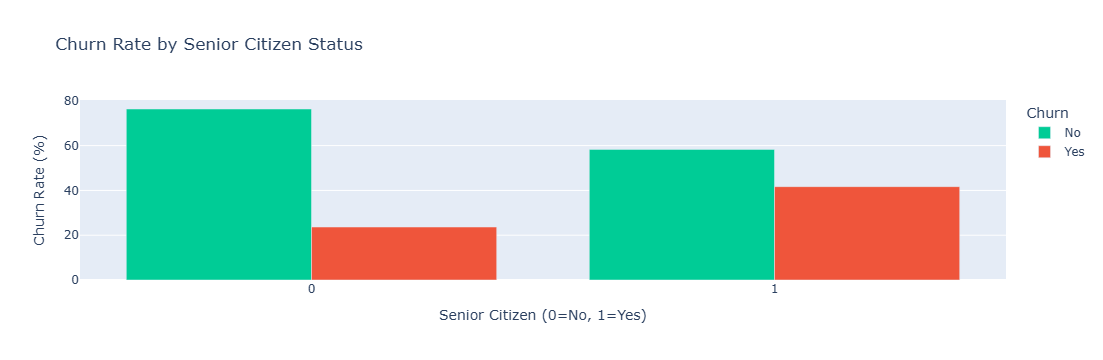

In [37]:
#Step-11:
# 3.Churn Rate by Senior Citizen
fig_senior = px.bar(
    churn_by_senior,
    barmode='group',
    title='Churn Rate by Senior Citizen Status',
    labels={'value': 'Percentage', 'SeniorCitizen': 'Senior Citizen (0=No, 1=Yes)'},
    color_discrete_sequence=['#00CC96', '#EF553B'])
fig_senior.update_layout(yaxis_title='Churn Rate (%)')
fig_senior.show()

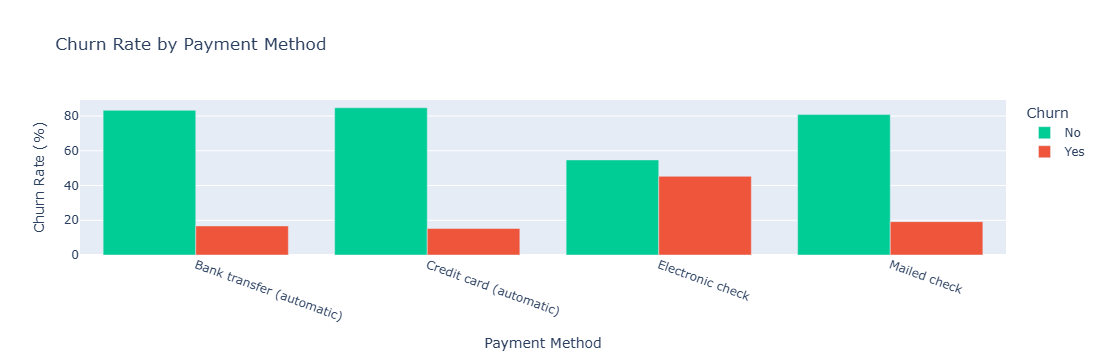

In [38]:
#Step-12:
# 4.Churn Rate by Payment Method
fig_payment = px.bar(
    churn_by_payment,
    barmode='group',
    title='Churn Rate by Payment Method',
    labels={'value': 'Percentage', 'PaymentMethod': 'Payment Method'},
    color_discrete_sequence=['#00CC96', '#EF553B'])
fig_payment.update_layout(yaxis_title='Churn Rate (%)', xaxis_tickangle=20)
fig_payment.show()

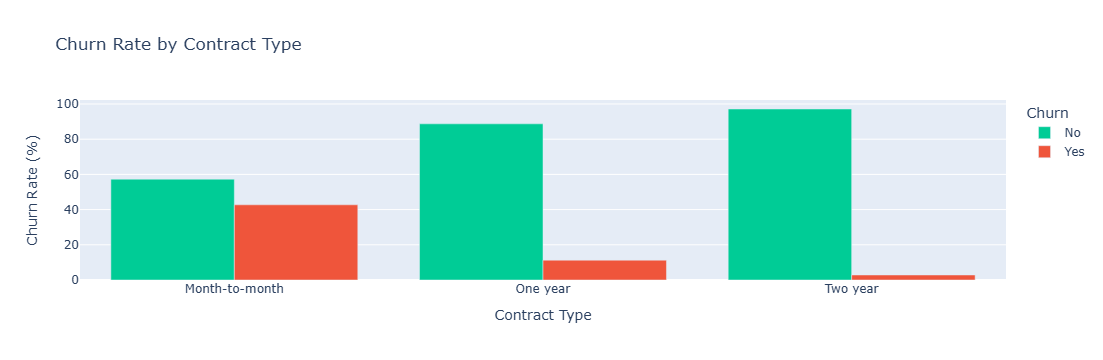

In [39]:
#Step-13:
# 5.Churn Rate by Contract Type
fig_contract = px.bar(
    churn_by_contract,
    barmode='group',
    title='Churn Rate by Contract Type',
    labels={'value': 'Percentage', 'Contract': 'Contract Type'},
    color_discrete_sequence=['#00CC96', '#EF553B'])
fig_contract.update_layout(yaxis_title='Churn Rate (%)')
fig_contract.show()